In [21]:
import os
import re
import matplotlib.pyplot as plt

# Task1. FTP links parsing

In [3]:
# removing output file 'ftps' if it is pre-existed
if os.path.isfile('ftps'):
        os.remove('ftps')
# parsing file 'references' for ftp links
pattern = re.compile(r'[;\s](ftp[^;\s]+)')
with open('references', 'r') as ref:
        next(ref)                                        # for first line skipping
        while True:  
            line  = ref.readline()
            for i in re.findall(pattern, line): # to find all ftp links in line
                with open('ftps', 'a') as ftps_file: 
                    ftps_file.write(f'{i}\n')            # writing ftp links in ftps file
            if line == '':
                break

# Task2. Finding all numbers in '2430 A.D.'

In [4]:
with open('2430AD', 'r') as file:
    pattern = re.compile(r'\b\d+\.?\d*\b')
    text  = file.read()
    numbers = re.findall(pattern, text)
print(numbers)

['2430', '1969', '2430', '2430', '57', '57', '1970', '3.68', '35', '460', '2430']


# Task3. Finding all words with 'A' or 'a'

In [5]:
pattern = re.compile(r'(?i)\b\S*[a]\S*\b')
Aa_words = re.findall(pattern, text)
len(Aa_words)

983

# Task4. Finding all exclamation sentences

In [6]:
pattern = re.compile(r'[A-Z][^\.?!]*!')
excl_sentences = re.findall(pattern, text)
excl_sentences

['Yes!',
 'Literally!',
 'There was once a time!',
 'Centuries ago!',
 'Think, Cranwitz!',
 'If we succeed!']

# Task5. The unique words length distribution in text (case-insensetive)

In [40]:
pattern = re.compile(r'''(?i)\b[\S]+\b''')
words = re.findall(pattern, text) # finding all words in the text
words = set([word.lower() for word in all_words]) # all unique words to low case
word_lengths = [len(word) for word in all_words] # length for each word
unique_lengths = set(word_lengths) # length for all unique words
# dictionary with word length as key and its share as value
length_distr = dict((length, word_lengths.count(length)/len(words)) for length in unique_lengths)

<BarContainer object of 20 artists>

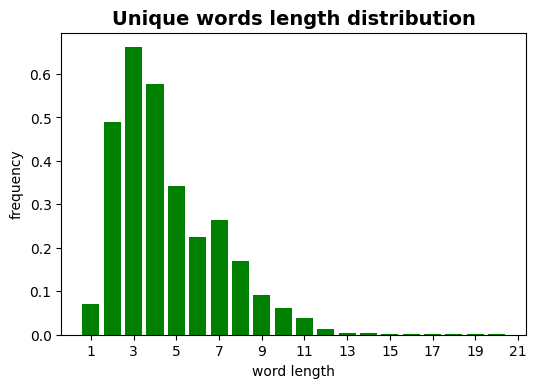

In [41]:
# Unique words length distribution bar plot
plt.figure(dpi=100)
plt.title('Unique words length distribution', fontweight='bold', size=14)
plt.xlabel('word length')
plt.ylabel('unique words length share')
plt.xticks(range(1, 22, 2))
plt.bar(length_distr.keys(), length_distr.values(), color='green')

# Task6. From Russian to Brickish

In [23]:
def brickish(phrase):
    '''Function brickish() translates Russian to brick language:)
    
    Parameters:
    phrase (str): word, phase, or sentence(s) to translate
    
    Returns:
    bricks (str): translation result
    '''
    
    def do_brick(sylab):
        return sylab.group(0) + 'к' + sylab.group(0)[-1].lower() 
    
    
    vowels = 'аАоОыЫуУэЭяЯёЁеЕиИюЮ'
    pattern = rf'[^\s{vowels}]?[{vowels}]'    
    bricks = re.sub(pattern, do_brick, phrase)
    return bricks


phrase = 'Я очень люблю картофель. Боже, дай мне больше картофеля и булок, и мяса!'
phrase, brickish(phrase)

('Я очень люблю картофель. Боже, дай мне больше картофеля и булок, и мяса!',
 'Якя окочекень люкюблюкю какартокофекель. Бокожеке, дакай мнеке бокольшеке какартокофекелякя ики букулокок, ики мякясака!')

# Task7. Function for searching sentences with given words number

In [20]:
def n_words_sentences(text, n):
    '''Function n_words_sentences() parses given text for sentences with n words
    
    Parameters:
    text (str): given text for searching
    n (int): number of words in sentence
    
    Returns:
    n_words (list of tuples): resulted tuples of words
    '''
    
    pattern = re.compile(r'(\b[A-ZА-Я]\w*\b)[,:;]?' + r'\s(\w+\b)[,:;]?'*(n-1) + r'(?:[\.!\?]|$)')
    n_words = re.findall(pattern, text)
    return n_words


text = 'Two words. One. Здесь два А здесь три. Here three words. God, potato duck. Three words indeed?'
n = 3
n_words_sentences(text, n)

[('А', 'здесь', 'три'),
 ('Here', 'three', 'words'),
 ('God', 'potato', 'duck'),
 ('Three', 'words', 'indeed')]